<a href="https://colab.research.google.com/github/Dunfu1993/House_Prices/blob/main/House_Prices_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load Packages and Data

In [16]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [17]:
! git clone https://github.com/Dunfu1993/House_Prices.git

Cloning into 'House_Prices'...


In [18]:
cd House_Prices

C:\Users\yangd\Documents\GitHub\House_Prices\House_Prices\House_Prices\House_Prices


In [19]:
!pip install kaggle

You should consider upgrading via the 'C:\Users\yangd\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [20]:
train = pd.read_csv("C:/Users/yangd/Documents/GitHub/Test/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
test = pd.read_csv("C:/Users/yangd/Documents/GitHub/Test/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
# Save the "Id" column

train_ID = train['Id']
test_ID = test['Id']

# Remove column "Utilitiles"

train.drop("Utilities", axis = 1, inplace = True)
test.drop("Utilities", axis = 1, inplace = True)

## Step 2: Data Cleaning
- Deleting Outliers
- Imputing Missing Values
- Variable Transformation

### Step 2.1: Deleting Outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

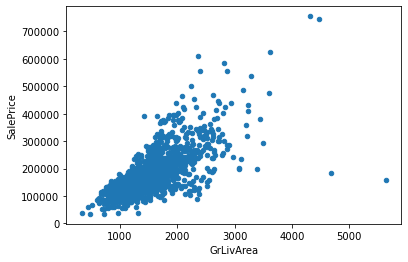

In [23]:
# Scatter plot between SalePrice and GrLivArea

var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

In [24]:
# The two values on the right-lower corner seem strange and they don't follow the trend, so we delete them.

train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [25]:
# Delete the two strange observations, we make a COPY of the original data and name the new data as "train1"
# "train1" is the newly-generated data set without outliers

train1 = train.copy()
train1 = train1.drop(train1[train1['Id'] == 524].index)
train1 = train1.drop(train1[train1['Id'] == 1299].index)

print("Dimension of the original data set: {}".format(train.shape))
print("Dimension of train1: {}".format(train1.shape))

Dimension of the original data set: (1460, 80)
Dimension of train1: (1458, 80)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

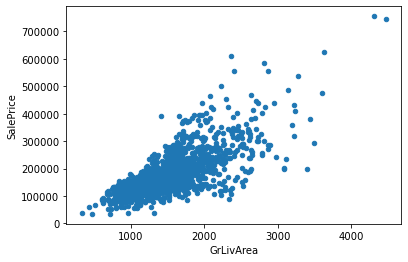

In [26]:
# Check the plot again

var = 'GrLivArea'
data = pd.concat([train1['SalePrice'], train1[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

### Step 2.2: Imputing Missing Values

In [27]:
total_number_of_missing = train1.isnull().sum().sort_values(ascending = False)
percent = (train1.isnull().sum() / train1.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_number_of_missing, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageCond,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556


In [28]:
train1["PoolQC"] = train1["PoolQC"].fillna("None")
train1["MiscFeature"] = train1["MiscFeature"].fillna("None")
train1["Alley"] = train1["Alley"].fillna("None")
train1["Fence"] = train1["Fence"].fillna("None")
train1["FireplaceQu"] = train1["FireplaceQu"].fillna("None")

# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

train1["LotFrontage"] = train1.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train1[col] = train1[col].fillna("None")
train1['GarageYrBlt'] = train1['GarageYrBlt'].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train1[col] = train1[col].fillna("None")
train1["MasVnrType"] = train1["MasVnrType"].fillna("None")
train1["MasVnrArea"] = train1["MasVnrArea"].fillna(0)
train1["MSZoning"] = train1["MSZoning"].fillna(train1["MSZoning"].mode()[0])
train1["Electrical"] = train1["Electrical"].fillna(train1["Electrical"].mode()[0])

In [29]:
train1.isnull().sum().max()

0

In [30]:
missing_in_test = test.isnull().sum().sort_values(ascending = False)
percent_test = (test.isnull().sum() / test.isnull().count()).sort_values(ascending = False)
missing_data_test = pd.concat([missing_in_test, percent_test], axis = 1, keys = ['Total', 'Percent'])
missing_data_test.head(35)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


In [31]:
(missing_data_test.Total != 0).sum()

32

In [32]:
test["PoolQC"] = test["PoolQC"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna("None")
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna("None")
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
test["MSZoning"] = test["MSZoning"].fillna(test["MSZoning"].mode()[0])
test["Functional"] = test["Functional"].fillna("Typ")
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])


In [33]:
test.isnull().sum().max()

0

### Step 2.3: Variable Transformation

- Target Variable

In [34]:
train1['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

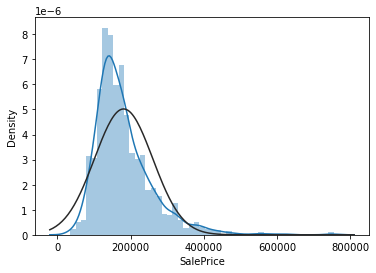

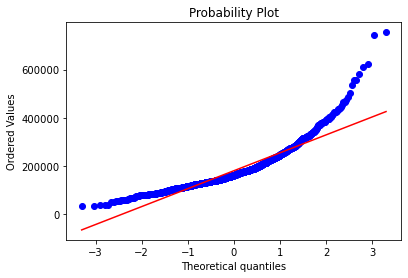

In [35]:
# We do the histogram and QQ-plot for the reponse

sns.distplot(train1['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(train1['SalePrice'], plot = plt)

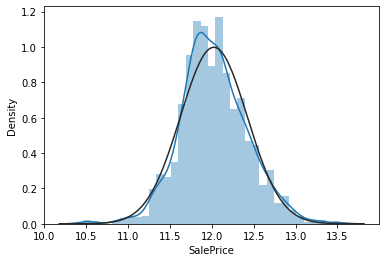

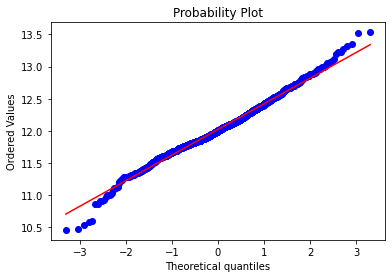

In [36]:
# The reponse is not normal, we do a log transformation to 'SalePrice' and name the data as 'train2'

train2 = train1.copy()
train2['SalePrice'] = np.log(train2['SalePrice'])

sns.distplot(train2['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(train2['SalePrice'], plot = plt)

- Combine train2 and test, delete 'Id' and 'SalePrice', save SalePrice as y_train, then do the transformation

In [37]:
ntrain = train2.shape[0]
ntest = test.shape[0]
y_train = train2.SalePrice.values
all_data = pd.concat((train2, test)).reset_index(drop=True)
all_data.drop(['SalePrice', 'Id'], axis=1, inplace=True)

print("all_data size is: {}".format(all_data.shape))

all_data size is: (2917, 78)


In [38]:
all_data.isnull().sum().max()

0

- Transform some numerical variables that are really categorical and get dummies

In [39]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)

In [40]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index

In [41]:
# Getting dummy categorical features

all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 609)


- Getting new train and test sets

In [42]:
train_cleaned = all_data[:ntrain]
test_cleaned = all_data[ntrain:]

- Boxcox trandformation for train and test set separately

In [43]:
skewed_features = train2[numeric_features].apply(lambda x: skew(x)).sort_values(ascending = False)
print(skewed_features)

MiscVal          24.434913
PoolArea         15.932532
LotArea          12.560986
3SsnPorch        10.286510
LowQualFinSF      8.995688
KitchenAbvGr      4.480268
BsmtFinSF2        4.247550
ScreenPorch       4.114690
BsmtHalfBath      4.095895
EnclosedPorch     3.083987
MasVnrArea        2.693554
OpenPorchSF       2.337421
LotFrontage       1.546624
WoodDeckSF        1.544214
GrLivArea         1.009951
BsmtUnfSF         0.919955
1stFlrSF          0.886723
2ndFlrSF          0.812121
BsmtFinSF1        0.764002
OverallCond       0.690324
HalfBath          0.679351
TotRmsAbvGrd      0.659822
Fireplaces        0.631409
BsmtFullBath      0.589751
TotalBsmtSF       0.511177
BedroomAbvGr      0.212107
OverallQual       0.200579
GarageArea        0.131612
FullBath          0.031239
GarageCars       -0.342025
dtype: float64


In [44]:
high_skew = skewed_features[abs(skewed_features) > 0.75]
print(high_skew)

MiscVal          24.434913
PoolArea         15.932532
LotArea          12.560986
3SsnPorch        10.286510
LowQualFinSF      8.995688
KitchenAbvGr      4.480268
BsmtFinSF2        4.247550
ScreenPorch       4.114690
BsmtHalfBath      4.095895
EnclosedPorch     3.083987
MasVnrArea        2.693554
OpenPorchSF       2.337421
LotFrontage       1.546624
WoodDeckSF        1.544214
GrLivArea         1.009951
BsmtUnfSF         0.919955
1stFlrSF          0.886723
2ndFlrSF          0.812121
BsmtFinSF1        0.764002
dtype: float64


In [45]:
skew_index = high_skew.index

In [46]:

for i in skew_index:
    train_cleaned[i] = boxcox1p(train_cleaned[i], boxcox_normmax(train_cleaned[i] + 1))

In [47]:
for i in skew_index:
    test_cleaned[i] = boxcox1p(test_cleaned[i], boxcox_normmax(test_cleaned[i] + 1))

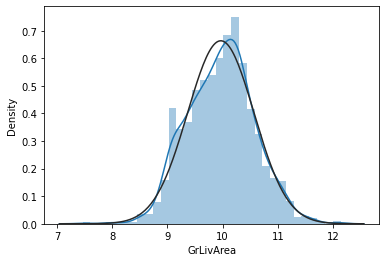

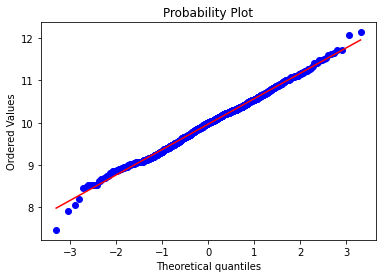

In [48]:
sns.distplot(train_cleaned['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(train_cleaned['GrLivArea'], plot = plt)

#### Warnings: Now the name of the two sets are "train_cleaned" & "test_cleaned", response is "y_train". It's ready to build model.

In [49]:
print(train_cleaned.shape)
print(test_cleaned.shape)

(1458, 609)
(1459, 609)


## Step 3: Model Building

In [50]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

In [51]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train_cleaned.values)
    rmse= np.sqrt(-cross_val_score(model, train_cleaned.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [52]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0006, random_state=1))

In [55]:
lasso.fit(train_cleaned.values, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0006, random_state=1))])

In [54]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0006, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0006, l1_ratio=.9, random_state=1))
score_1 = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score_1.mean(), score_1.std()))
score_2 = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score_2.mean(), score_2.std()))


Lasso score: 0.1083 (0.0145)

ElasticNet score: 0.1083 (0.0145)



In [65]:
y_pred = lasso.predict(test_cleaned.values)

In [66]:
y_pred.shape

(1459,)

In [59]:
lasso.get_params([Lasso])

{'memory': None,
 'steps': [('robustscaler', RobustScaler()),
  ('lasso', Lasso(alpha=0.0006, random_state=1))],
 'verbose': False,
 'robustscaler': RobustScaler(),
 'lasso': Lasso(alpha=0.0006, random_state=1),
 'robustscaler__copy': True,
 'robustscaler__quantile_range': (25.0, 75.0),
 'robustscaler__unit_variance': False,
 'robustscaler__with_centering': True,
 'robustscaler__with_scaling': True,
 'lasso__alpha': 0.0006,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 1,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [62]:
lasso.steps[1]

('lasso', Lasso(alpha=0.0006, random_state=1))

- XGBoost

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603,
                             gamma=0.0468, 
                             learning_rate=0.05, 
                             max_depth=3, 
                             min_child_weight=1.7817, 
                             n_estimators=2200,
                             reg_alpha=0.4640, 
                             reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =0, 
                             nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[01:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

- LightGBM

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=5,
                              learning_rate=0.05, 
                              n_estimators=720,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              bagging_freq = 5, 
                              feature_fraction = 0.2319,
                              feature_fraction_seed=9, 
                              bagging_seed=9,
                              min_data_in_leaf =6, 
                              min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1167 (0.0156)

